# Введение в обучение без учителя. Базовая кластеризация


Представьте, что вы работаете дата-сайентистом и получаете задачу по маркетинговому исследованию клиентов. Вам необходимо выделить группы покупателей по степени интереса к продукту и по сумме, которую они тратят.

Как решить данную задачу?

Обучение с учителем здесь не подходит, так как у нас нет правильных ответов о степени заинтересованности покупателей в продукте.

Однако не спешите расстраиваться — на помощь придёт обучение без учителя, а именно кластеризация.

Мы уже рассматривали суть кластеризации в модуле ML-1.

Кластеризация позволяет разбить объекты на группы, которые называются кластерами.

Например, на картинке ниже изображены разные кластеры еды и напитков:

→ Похожие объекты оказываются внутри одного кластера. Если же объекты разные, то они должны оказаться в разных кластерах.

Также у каждого кластера есть центроид.

Центроид — это центр масс кластера, или среднее значение координат объектов кластера.

На рисунке ниже изображено три кластера, крестик в каждом из них — это центроид:

Как найти этот центроид?

Допустим, у нас есть маленький кластер, состоящий из четырёх точек. Каждая точка описывается только одним свойством — , рост человека:
	, рост
Человек № 1 	180
Человек № 2 	170
Человек № 3 	181
Человек № 4 	160

Тогда для нахождения центроида мы берём все значения по оси x и считаем среднее:

центроидкластера

Что делать, если данные описываются двумя свойствами, например, рост () и вес ()?

Тогда у этих точек есть - и -координаты:
	, рост 	, вес
Человек № 1 	180 	70
Человек № 2 	170 	60
Человек № 3 	181 	65
Человек № 4 	160 	45

Для нахождения координат центроида мы последовательно находим:

        Координату : 

центроид
.
Координату :
центроид

        .

Таким образом, координаты центроида — (172, 60).

Если объект описывается бόльшим количеством признаков (например, рост (), вес (), объём талии () и т. д.), то для нахождения координат центроида мы последовательно, по каждому признаку (координате), ищем среднее значение.

Алгоритм k-means

Рассмотрим один из наиболее популярных методов кластеризации — k-means.

Данный алгоритм был разработан ещё в 1950-х, но благодаря скорости своей работы он до сих пор остаётся востребованным.

Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

Мы итерируемся по каждому кластеру и для всех векторов внутри кластера подсчитываем центроиды (). Далее рассчитываем разницу между каждым вектором кластера и центроидом кластера . Необходимо, чтобы это значение, возведённое в квадрат (), было минимальным для каждого кластера.

А сейчас переведём сложные математические термины на человеческий язык.

Рассмотрим работу данного алгоритма на примере. Допустим, у нас есть данные с разными значениями свойства . Эти данные необходимо разделить на кластеры. Нанесём значения свойства  на ось X:
img

Для этих данных нам нужно провести анализ и выделить три кластера. Вы с большой вероятностью скажете, что данные можно разделить на кластеры (жёлтый, розовый и зелёный) следующим образом:
img

Но как реализовать это в алгоритме? Алгоритм k-means состоит из девяти шагов. Давайте подробно рассмотрим каждый из них:
1
	

Решаем, на сколько кластеров хотим разделить данные.

В данном случае у нас будет три кластера. Значит, у алгоритма k-means .
img
2
	

Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров:
img
3
	

Распределим оставшиеся объекты датасета по трём кластерам.

Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.

Возьмём первый объект датасета и рассчитаем расстояние (L1, L2 и L3) от этого объекта до центроида каждого кластера:
img

Найдём, к какому центроиду данный объект находится ближе всего. L1 имеет наименьшее значение — значит, объект располагается ближе всего к центроиду жёлтого кластера и будет отнесён к нему:
img

После этого такую же процедуру мы проводим для остальных объектов датасета. В итоге получаем следующее распределение данных:
img

Два объекта оказались ближе всего к розовому кластеру, три объекта — к зелёному.
4
	

Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды и для удобства выделим их на рисунке вертикальной линией:
img
5
	

После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов:
img

Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

В нашем случае центроиды изменились несильно, и все объекты остались в своих кластерах.
6
	

Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.
7
	

Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида.

Находим суммарное отклонение:
img
8
	

Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2.

Зачем это нужно?

В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной (шесть оставшихся объектов будут принадлежать к зелёному кластеру), как на рисунке ниже:
img

Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 2. В sklearn по умолчанию проводится десять итераций.
9
	

Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации.

Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

Очевидно, что если все объекты будут в одном кластере, это будет худший сценарий с максимальным среднеквадратичным отклонением:
img

Если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, так как один объект будет являться и объектом кластера, и его центром масс, а значит расстояние между объектом кластера и центроидом кластера равно нулю. Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные:
img

Только что мы рассмотрели, как работает алгоритм для одномерного случая (если есть только один признак, описывающий объект). Ниже вы можете увидеть, как работает алгоритм для двухмерного случая (когда объект описывается двумя признаками).

img

Если объект описывается тремя и более признаками, поиск кластеров идёт в -мерном пространстве признаков. Однако такую работу алгоритма довольно сложно визуализировать.

Рассмотренный нами алгоритм был основан на центроидах: мы находили центры кластеров и присваивали объекты к ближайшему центроиду кластера.

На самом деле центры кластера можно определять разными способами. В зависимости от этого выделяется несколько вариаций алгоритма k-means:

Название 	ПРинцип работы 	Подробности
k-means 	

Находит центроиды кластера как среднее значение координат.
	

Документация

(init='random')
K-MEANS++ 	

В классическом алгоритме k-means центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.

Алгоритм k-means++ чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.
	

Документация

(init='k-means++'; по умолчанию в sklearn при запуске k-means используется алгоритм k-means++)
k-medians 	

На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.
	

Документация
k-medoids 	

Работает так же, как k-medians, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера.
	Документация
fuzzy c-means 	

Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью.
	Документация

Теперь мы знаем, как работает алгоритм k-means, но не хотелось бы реализовывать его с нуля. Для того чтобы запустить алгоритм кластеризации k-means, нам нужна библиотека sklearn и модуль KMeans.

Что необходимо для запуска?

        Обязательно задать количество кластеров, на которые необходимо разделить данные.
        Данные, т. е. параметры объектов (), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

        n_clusters — количество кластеров. По умолчанию — 8.
        init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.
        n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.
        max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
        random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Теперь попробуем применить полученные знания на практике.

У нас есть данные по покемонам. Для каждого покемона известны его сила атаки, уровень защиты, скорость бега и ещё пара параметров. Попробуем найти кластеры покемонов, основываясь на силе атаки и уровне защиты.

Недостатки алгоритма k-means

        Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

        Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

        Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

        Например, на картинке ниже зелёная точка справа — явный выброс. Но получилось так, что этот выброс находится ближе всего к зелёному кластеру, поэтому выброс был отнесён к нему. При подсчёте центроида для зелёного кластера появится искажение, так как выброс сильно на это повлияет:
        img

        Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

        Например, если данные распределены, как на левом и среднем рисунках ниже, алгоритм k-means будет проводить кластеризацию некорректно и выделять два довольно странных кластера (синий и оранжевый). На правом рисунке изображены кластеры удлинённой формы, и для них k-means также отрабатывает плохо. Так происходит потому, что алгоритм ищет ближайших соседей и поэтому выделяет зелёным две нижних части двух разных кластеров, считая их ближайшими соседями.
        img

        Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

Определение оптимального k для алгоритма k-means

Рассмотрим, как побороть один из существенных недостатков алгоритма, а именно — как подобрать оптимальное количество кластеров.

→ Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим метод локтя и коэффициент силуэта.

Начнём с метода локтя.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

img

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.
img
Источник изображения

На графике видно, что линия напоминает локоть — отсюда и название метода. Оптимальное число кластеров находится как раз на «локтевом сгибе». 

Таким образом, нам необходимо построить график и найти тот самый перегиб с оптимальным количеством кластеров. В данном случае оптимальное количество кластеров равно 4.

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции:



# 3. Метрики

✍Итак, подбирать оптимальное количество кластеров мы научились. Но как оценить, насколько хорошие кластеры у нас получились?

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:
img

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

→ Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:
1
	

Однородность кластеров (homogeneity score)

Данная метрика, как и три последующих, может применяться, только когда есть размеченные данные.

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.
Формула (для любознательных)

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:
img

Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

→ В первом кластере метрика однородности будет максимальной и равна 1, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно 0.

Теперь посмотрим, как рассчитать метрику однородности в sklearn:




In [2]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:
img

labels_true — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с labels_true.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:
img

## Полнота кластера (completeness score)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

# 9. PCA и t-SNE, или зачем понижать размерность?

✍ В предыдущих юнитах мы работали преимущественно в двухмерном или трёхмерном пространстве. Наши объекты описывались двумя или тремя признаками. Однако зачастую в реальных задачах объекты описываются куда большим числом признаков, а значит, работать приходится в многомерном пространстве, которое невозможно визуализировать.

Трудности могут возникнуть, если:

        нужно визуализировать результаты кластеризации, а пространство признаков многомерное.
        нужно обучить модель, а объект описывается большим количеством признаков. Эти признаки могут быть избыточными или малоинформативными, что приведёт к плохим результатам при обучении модели.

Избежать этих проблем поможет снижение размерности данных.

→ Мы встречались с уменьшением размерности ранее, например когда рассматривали спектральную кластеризацию. В данном юните мы поближе познакомимся с тем, как работают алгоритмы снижения размерности, рассмотрим такие техники, как PCA и t-SNE.

Задача снижения размерности — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Как вы можете догадаться, при уменьшении количества признаков мы теряем часть информации. Например, на изображении ниже Губка Боб после уменьшения размерности стал описываться меньшим количеством признаков и поэтому стал выглядеть по-другому.

Методы снижения размерности могут преобразовывать данные двумя способами:

        линейно,
        нелинейно.

## PCA

Метод главных компонент, или PCA (Principal Components Analysis) — это один из базовых способов уменьшения размерности.

Данный метод имеет широкое применение:

        Подавление шума на изображениях.

        Изображение состоит из пикселей, которые можно рассматривать как набор точек в многомерном пространстве. С помощью метода снижения размерности PCA можно преобразовать этот набор точек и оставить только первые компоненты, полученные после преобразования. В этих компонентах будет содержаться основная информация об изображении, но не будет шума. Таким образом мы улучшим качество изображения.

        Качество картинки с шумом и без него:



        Индексация видео для быстрого поиска по базе.

        Каждый кадр видео можно преобразовать с помощью PCA и представить несколькими значениями. Далее эти значения легко хранить и искать в базе.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

Например, если у нас есть данные о полученных студентами баллах на экзаменах по двух предметам, мы можем визуализировать эти данные в 2D-пространстве, где по оси x будут баллы по одному предмету, а по оси y — по второму:

Далее мы вводим две новые оси, которые являются линейными комбинациями предыдущих. Ось PC1 проходит через максимальную дисперсию данных и является суммой исходных осей, а ось PC2 является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию:

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.

Рассмотрим, как запустить PCA с помощью библиотеки sklearn:

Также мы можем сразу обучить модель и применить трансформацию уменьшения размерности:

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет MNIST — это данные, основанные на рукописном начертании цифр:

Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

В датасете MNIST представлено 70 000 изображений, каждое из которых описывается 784 признаками.



In [4]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

In [5]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 390.0874903202057, метрика модели 0.9255714285714286
Модель, построенная на всех исходных признаках. Время обучения 944.120810508728, метрика модели 0.9185714285714286


Как видим, в данном случае мы потратили на обучение модели в два раза меньше времени, а качество осталось практически таким же.

В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

→ Мы научились ускорять обучение моделей с помощью понижения размерности данных, а теперь давайте научимся визуализировать многомерное пространство.



## t-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением». 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Рассмотрим t-SNE на примере понижения размерности двухмерного пространства до одномерного.

Если у нас есть такое распределение точек, как на графике ниже,

то, казалось бы, чтобы уменьшить размерность данных, нужно просто спроецировать эти точки на ось x:

Но, как мы видим, розовый и синий кластеры перестают быть различными кластерами, когда мы проецируем данные на ось X — данные перемешались. t-SNE позволяет не допускать такого.

Алгоритм состоит из следующих шагов:

1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:
На рисунке выше показано, как для одной точки рассчитали расстояние до всех других точек датасета, далее получили схожесть объектов с помощью нормального распределения и построили матрицу. На данной матрице по строкам и столбцам находятся объекты датасета, а в ячейках — значения схожести двух объектов. Красным обозначена похожесть объекта на самого себя (в таком случае это значение максимально), а розовым — объекты, которые имеют большую схожесть.

2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а t-распределение. После этого строим матрицу попарной схожести объектов:

3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:
С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

На первой итерации данные расположены хаотично, но с каждой итерацией похожие объекты подходят ближе друг к другу, а непохожие отдаляются друг от друга.

## Как запустить t-SNE?

Важные параметры для запуска:

        n_components — размерность нового пространства.
        perplexity — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
        n_iter — количество итераций для оптимизации.
        random_state — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании PCA и tSNE.

Уменьшим размерность с помощью PCA:

<AxesSubplot: xlabel='0', ylabel='1'>

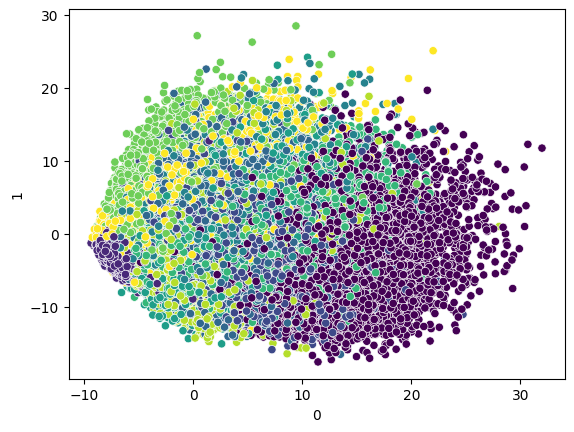

In [8]:
import seaborn as sns
import pandas as pd

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

Уменьшим размерность с помощью t-SNE:

/home/egor/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/egor/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: xlabel='0', ylabel='1'>

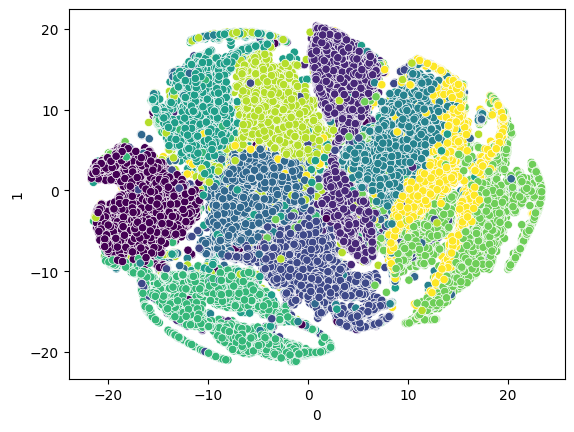

In [9]:
# импортируем класс t-SNE TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

img

Как видим, алгоритм t-SNE отлично справляется с уменьшением размерности для визуализации, а вот при использовании PCA данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.

В данном юните мы изучили несколько техник уменьшения размерности данных. Эти методы используются для разных целей. Давайте кратко подведём итоги и составим сводную таблицу: